<a href="https://colab.research.google.com/github/Mal-Lem/Segmentation-Clients/blob/main/Segmentation_clients.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Segmentation des Clients**

# 1) Busniss undrestanding


 L'entreprise souhaite mieux comprendre ses clients afin de mieux les cibler avec des offres et des strat√©gies marketing adapt√©es. L'objectif principal est de segmenter les clients en groupes ayant des comportements similaires.

**Objectifs commerciaux :**

  * Optimisation des campagnes marketing : Personnaliser les campagnes en fonction des segments de clients pour augmenter le taux de conversion.

  * Am√©lioration de la fid√©lit√© : Adapter les strat√©gies de fid√©lisation en fonction des segments, en proposant des produits ou services qui correspondent aux besoins sp√©cifiques de chaque groupe.

  * Maximisation des revenus : Identifier les segments les plus rentables et les cibler sp√©cifiquement avec des promotions.

ensemble de donn√©es utilis√©: https://www.kaggle.com/datasets/shwetabh123/mall-customers

# 2) Data understanding

In [153]:
import warnings
warnings.filterwarnings("ignore")

In [154]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
import seaborn as sns

url = "/content/Mall_Customers.csv"
data = pd.read_csv(url)
data.head()

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

In [155]:
data.describe()

CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000

In [156]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [157]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [158]:
df = pd.DataFrame(data)
# transformer les colonnes non num√©rique
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})
df.head()

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1       0   19                  15                      39
1           2       0   21                  15                      81
2           3       1   20                  16                       6
3           4       1   23                  16                      77
4           5       1   31                  17                      40

In [159]:
df = df.drop('CustomerID', axis=1)
df.head()

Gender  Age  Annual Income (k$)  Spending Score (1-100)
0       0   19                  15                      39
1       0   21                  15                      81
2       1   20                  16                       6
3       1   23                  16                      77
4       1   31                  17                      40

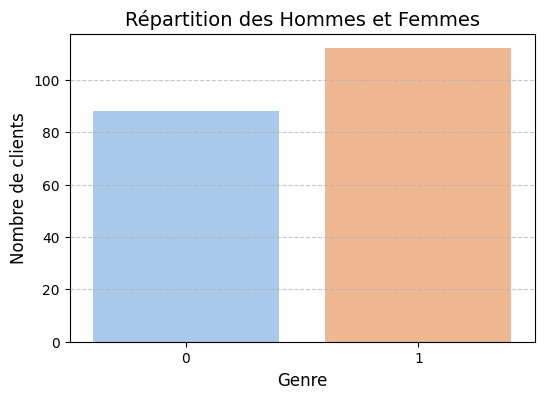

In [160]:
gender_counts = df["Gender"].value_counts()

plt.figure(figsize=(6, 4))
sns.barplot(x=gender_counts.index, y=gender_counts.values, palette="pastel")

plt.title("R√©partition des Hommes et Femmes", fontsize=14)
plt.xlabel("Genre", fontsize=12)
plt.ylabel("Nombre de clients", fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()


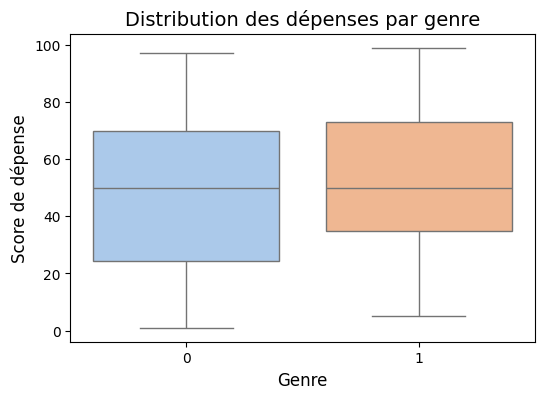

In [161]:
plt.figure(figsize=(6, 4))
sns.boxplot(x="Gender", y="Spending Score (1-100)", data=df, palette="pastel")

plt.title("Distribution des d√©penses par genre", fontsize=14)
plt.xlabel("Genre", fontsize=12)
plt.ylabel("Score de d√©pense", fontsize=12)

plt.show()


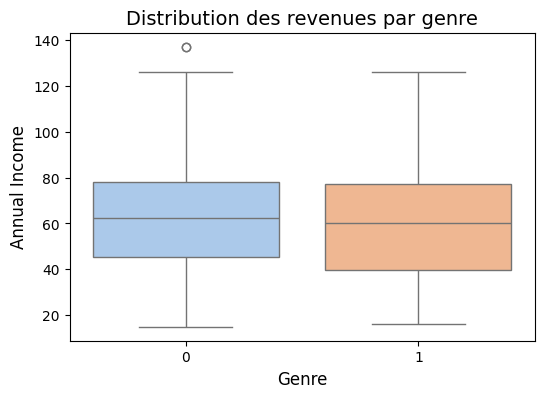

In [162]:
plt.figure(figsize=(6, 4))
sns.boxplot(x="Gender", y="Annual Income (k$)", data=df, palette="pastel")

plt.title("Distribution des revenues par genre", fontsize=14)
plt.xlabel("Genre", fontsize=12)
plt.ylabel("Annual Income", fontsize=12)

plt.show()

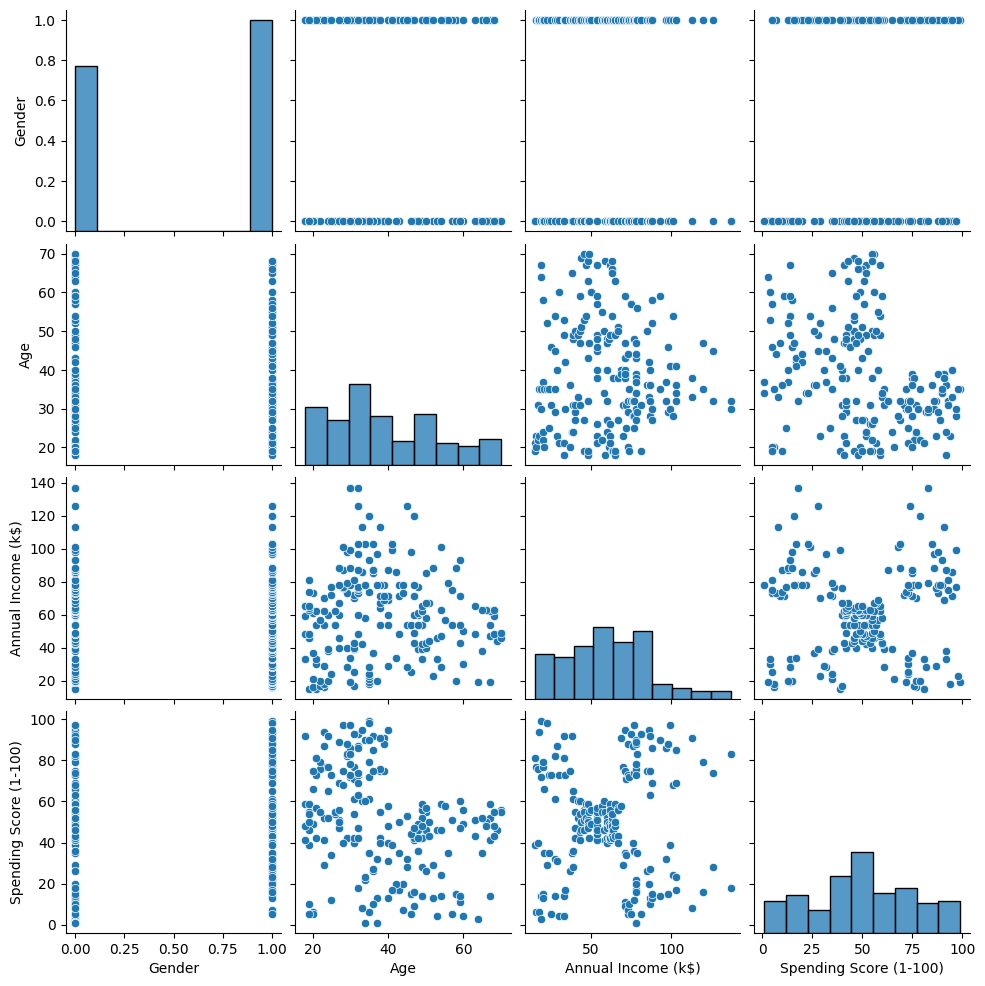

In [163]:
sns.pairplot(data=df)

**Corr√©lations lin√©aires :**

  Si deux variables sont fortement corr√©l√©es, les points s‚Äôaligneront assez bien le long d‚Äôune droite).

  Si les points sont dispers√©s sans forme particuli√®re, cela sugg√®re qu'il n'y a pas de corr√©lation lin√©aire forte entre les deux variables.

**Corr√©lations non lin√©aires :**

  Si la relation entre deux variables forme une courbe ou une autre forme g√©om√©trique, cela sugg√®re une corr√©lation non lin√©aire. Par exemple, un pairplot peut montrer une relation quadratique (forme parabolique)

**Distributions individuelles :**

  Les histogrammes permettent d'observer la r√©partition de chaque variable. Cela peut vous aider √† voir si les variables sont sym√©triques, biais√©es, uniformes, ou suivent une distribution particuli√®re (comme normale, exponentielle, etc.).


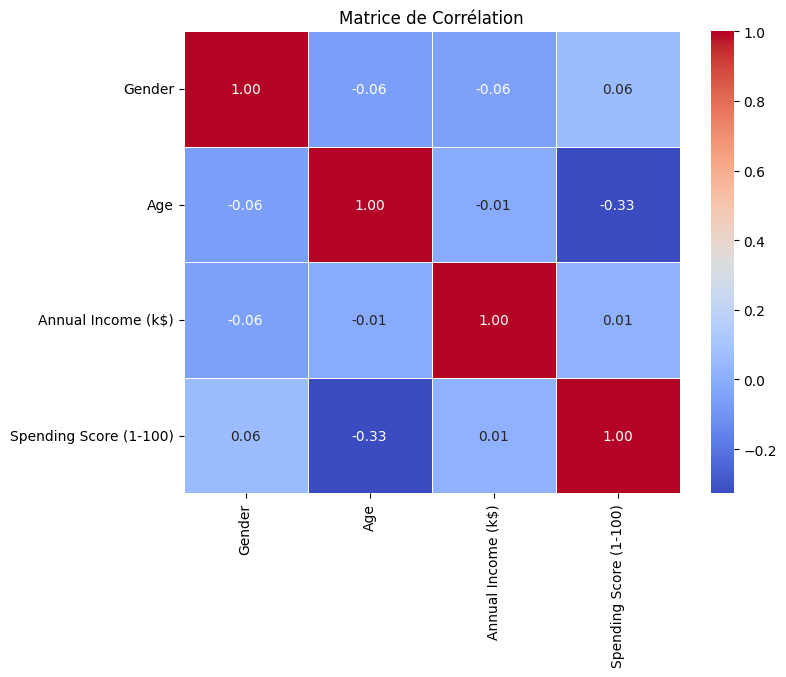

In [164]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Matrice de Corr√©lation")
plt.show()


# 3) Data Preparation

In [165]:
df = df.drop('Gender', axis=1)
df.head()

Age  Annual Income (k$)  Spending Score (1-100)
0   19                  15                      39
1   21                  15                      81
2   20                  16                       6
3   23                  16                      77
4   31                  17                      40

In [166]:
X = df.drop('Age', axis=1)
X.head()

Annual Income (k$)  Spending Score (1-100)
0                  15                      39
1                  15                      81
2                  16                       6
3                  16                      77
4                  17                      40

**Standardisation des donn√©es pour K-Means**
c'est l'une des conditions n√©cessaire √† avoir pour appliquer l K-means pour centrer (moyenne = 0) et r√©duire (√©cart-type = 1)

StandardScaler : z = ( X ‚àí Œº) / œÉ

In [167]:
moyenne = X.mean(axis=0)
ecart_type = X.std(axis=0)

print("moyenne avant standardisation :")
print(moyenne)

print("\n√©cart type avant standardisation :")
print(ecart_type)

moyenne avant standardisation :
Annual Income (k$)        60.56
Spending Score (1-100)    50.20
dtype: float64

√©cart type avant standardisation :
Annual Income (k$)        26.264721
Spending Score (1-100)    25.823522
dtype: float64


In [168]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(pd.DataFrame(X_scaled, columns=X.columns).head())

   Annual Income (k$)  Spending Score (1-100)
0           -1.738999               -0.434801
1           -1.738999                1.195704
2           -1.700830               -1.715913
3           -1.700830                1.040418
4           -1.662660               -0.395980


toutes les valeurs sont autours de 0 parfait!!

In [169]:
moyenne_scaled = X_scaled.mean(axis=0)
ecart_type_scaled = X_scaled.std(axis=0)

print("\nmoyenne apr√®s standardisation :")
print(moyenne_scaled)

print("\n√©cart type apr√®s standardisation :")
print(ecart_type_scaled)


moyenne apr√®s standardisation :
[-2.13162821e-16 -1.46549439e-16]

√©cart type apr√®s standardisation :
[1. 1.]


**Trouver le bon nombre de clusters avec la methode de coude (elbow methode)** :    
 bas√©e sur la recherche du point o√π l'ajout de nouveaux clusters ne permet plus d'am√©liorer significativement la qualit√© du clustering

In [170]:
inertie = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, n_init=400, random_state=22)
    kmeans.fit(X_scaled)
    inertie.append(kmeans.inertia_)

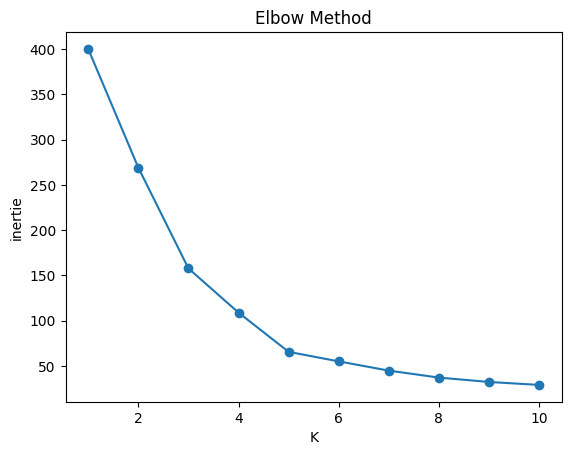

In [171]:
plt.plot(range(1, 11), inertie, marker='o')
plt.xlabel('K')
plt.ylabel('inertie')
plt.title('Elbow Method')
plt.show()

On choisit le k o√π l'inertie commence √† diminuer lentement

**Validation du choix de k avec le Silhouette Score**

In [172]:
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
labels = kmeans.fit_predict(X_scaled)

silhouette_avg = silhouette_score(X_scaled, labels)
print(f"Silhouette Score pour k={n_clusters} : {silhouette_avg:.2f}")


Silhouette Score pour k=5 : 0.55


* Si le score est proche de 1 ‚ûù les clusters sont bien s√©par√©s et coh√©rents.
* Si le score est bas (< 0.5) ‚ûù les clusters se m√©langent et k doit √™tre ajust√©

# 4) Modeling

Pourquoi le choix de KMeans ?

  * KMeans est rapide, simple √† impl√©menter et interpr√©ter

  * Il est bien adapt√© √† la segmentation bas√©e sur des distances entre individus

  * Le jeu de donn√©es est non-labellis√©, donc un algorithme de clustering non supervis√© est appropri√©

  * On souhaite identifier des profils clients similaires, ce que fait KMeans efficacement

  * Facilement combinable avec des visualisations pour analyser les groupes form√©s

In [173]:
kmeans = KMeans(n_clusters=5, n_init=400, random_state=22)
kmeans.fit(X_scaled)

# entrainer puis predir
clusters = kmeans.labels_
centroids_scaled = kmeans.cluster_centers_

centroids = scaler.inverse_transform(centroids_scaled)

# creation cluster
df['Clusters'] = clusters


In [174]:
nom_segments = {
    0: 'Clients fid√®les mais modestes',
    1: 'Consommateurs r√©guliers',
    2: 'Clients √©conomes',
    3: 'Clients dormants',
    4: 'Clients premium'
}
# cr√©er une colonne 'Segment' avec les noms significatifs
df['Segment'] = df['Clusters'].map(nom_segments)

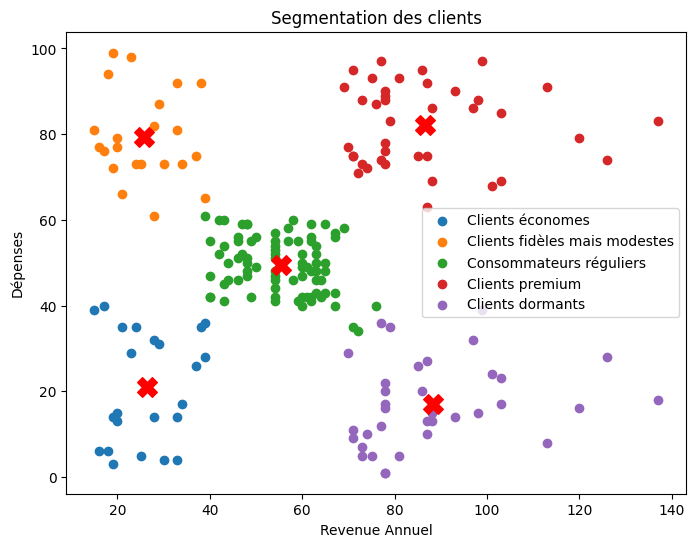

In [175]:
plt.figure(figsize=(8, 6))

for nom_segment in df['Segment'].unique():
    cluster_data = df[df['Segment'] == nom_segment]
    plt.scatter(cluster_data['Annual Income (k$)'], cluster_data['Spending Score (1-100)'], label=nom_segment)

for i, center in enumerate(centroids):
    plt.scatter(center[0], center[1], c='red', s=200, marker='X')

plt.xlabel('Revenue Annuel')
plt.ylabel('D√©penses')
plt.title('Segmentation des clients')
plt.legend()
plt.show()

Ces interpr√©tations permettent de construire des strat√©gies marketing cibl√©es, par exemple :

  * R√©compenser les clients premium

  * R√©activer les clients dormants

  * Fid√©liser les consommateurs r√©guliers

# 5) Evaluation

In [176]:
new_data = pd.DataFrame({
    'Annual Income (k$)': [60, 70, 80],
    'Spending Score (1-100)': [10, 55, 80]
})

# standardiser les nouvelles donn√©es avec le m√™me scaler
new_data_scaled = scaler.transform(new_data)

# pr√©dire les clusters pour les nouvelles donn√©es
new_clusters = kmeans.predict(new_data_scaled)

#sil_score = silhouette_score(X_scaled, kmeans.labels_)
#print("Silhouette Score:", sil_score)

new_data['Predicted Cluster'] = new_clusters
print(new_data)


   Annual Income (k$)  Spending Score (1-100)  Predicted Cluster
0                  60                      10                  3
1                  70                      55                  1
2                  80                      80                  4


# 6) Deployment

In [177]:
import pickle

# Apr√®s avoir entra√Æn√© ton mod√®le
with open("model.pkl", "wb") as f:
    pickle.dump(kmeans, f)

# Et si tu as un scaler :
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)


In [178]:
# G√©n√©ration du fichier dashboard.py avec toutes les fonctionnalit√©s demand√©es

code = '''
import streamlit as st
import pandas as pd
import numpy as np
import pickle
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Chargement du mod√®le et du scaler
model = pickle.load(open("model.pkl", "rb"))
scaler = pickle.load(open("scaler.pkl", "rb"))

st.set_page_config(page_title="Segmentation Clients", layout="wide")
st.title("üéØ Segmentation des Clients - Dashboard Interactif")

# Chargement des donn√©es
uploaded_file = st.file_uploader("üìÇ Importer un fichier CSV (colonnes: CustomerID, Gender, Age, Annual Income, Spending Score)", type=["csv"])

if uploaded_file is not None:
    data = pd.read_csv(uploaded_file)
    st.success("‚úÖ Fichier import√© avec succ√®s")
else:
    if os.path.exists("Mall_Customers.csv"):
        data = pd.read_csv("Mall_Customers.csv")
        st.warning("‚ö†Ô∏è Aucun fichier import√©. Utilisation du dataset par d√©faut.")
    else:
        st.error("‚ùå Aucun fichier import√© et 'Mall_Customers.csv' introuvable.")
        st.stop()

# Nettoyage et pr√©paration
df = data.copy()
if 'Gender' in df.columns:
    df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

features = ['Annual Income (k$)', 'Spending Score (1-100)']

X = df[features]
scaled_data = scaler.transform(X)
df['Cluster'] = model.predict(scaled_data)

# Mapping des clusters (modifiable selon ton analyse)
noms_clusters = {
    0: 'Clients fid√®les mais modestes',
    1: 'Consommateurs r√©guliers',
    2: 'Clients √©conomes',
    3: 'Clients dormants',
    4: 'Clients premium'
}
df['Segment'] = df['Cluster'].map(noms_clusters)

# AFFICHAGES
st.header("üëÅÔ∏è‚Äçüó®Ô∏è Aper√ßu des Donn√©es")
st.dataframe(df.head())

st.header("üìä Statistiques Descriptives")
st.dataframe(df.describe())

# Visualisations
st.header("üìà Visualisations")

col1, col2 = st.columns(2)
with col1:
    st.subheader("Distribution de l'√¢ge")
    fig1, ax1 = plt.subplots()
    sns.histplot(df['Age'], kde=True, ax=ax1)
    st.pyplot(fig1)

with col2:
    if 'Gender' in df.columns:
        st.subheader("R√©partition par genre")
        fig2, ax2 = plt.subplots()
        sns.countplot(x='Gender', data=df, ax=ax2)
        st.pyplot(fig2)

st.subheader("üßÆ Scatter Plot - Income vs Score (avec clusters)")
fig3, ax3 = plt.subplots()
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='Set2', ax=ax3)
st.pyplot(fig3)

# Analyse des clusters
st.header("üß† Analyse des Segments")
cluster_counts = df['Segment'].value_counts()
st.bar_chart(cluster_counts)

st.subheader("üìå Moyenne des variables par Cluster")
st.dataframe(df.groupby('Segment')[features].mean())

# PCA pour visualisation 2D des clusters
st.subheader("üé® Visualisation 2D des Clusters (PCA)")
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)
df_pca = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])
df_pca['Cluster'] = df['Cluster']

fig4, ax4 = plt.subplots()
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='Cluster', palette='Set2', ax=ax4)
st.pyplot(fig4)

# Export des r√©sultats
st.header("üì• Exporter les R√©sultats")
csv = df.to_csv(index=False).encode('utf-8')
st.download_button("üìÅ T√©l√©charger le fichier avec clusters", data=csv, file_name='segmentation_clients.csv', mime='text/csv')
'''

with open("dashboard.py", "w") as f:
    f.write(code)

In [179]:
!pip install streamlit pyngrok

In [180]:
!ngrok config add-authtoken 2wsDQ2OHR6pWYbeIqKtezpKVFP0_75xqMP9aTQLQN6vB8NXg

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [181]:
from pyngrok import ngrok
import time

# D√©marrer le tunnel
public_url = ngrok.connect(8501)
print("Public URL:", public_url)

# Lancer l'app Streamlit
!streamlit run dashboard.py &

# Attendre que l'app d√©marre
time.sleep(5)


Public URL: NgrokTunnel: "https://43a3-34-75-195-37.ngrok-free.app" -> "http://localhost:8501"



  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.75.195.37:8501

  Stopping...


# 7) Synth√®se sur le projet :

Ce projet met en ≈ìuvre un pipeline de segmentation client complet, de l‚Äôingestion des donn√©es jusqu‚Äôau d√©ploiement d‚Äôune application interactive via Streamlit. Gr√¢ce √† l‚Äôutilisation de KMeans, nous avons pu identifier des profils clients clairs et exploitables. Ce syst√®me permet aux √©quipes marketing de :

    * Mieux comprendre leur base client

    * Cibler leurs actions commerciales

    * Suivre l‚Äô√©volution des comportements clients dans le temps

Le projet a √©t√© con√ßu pour √™tre reproductible, interactif et facilement d√©ployable, notamment via une application Streamlit connect√©e √† un mod√®le pr√©entra√Æn√©

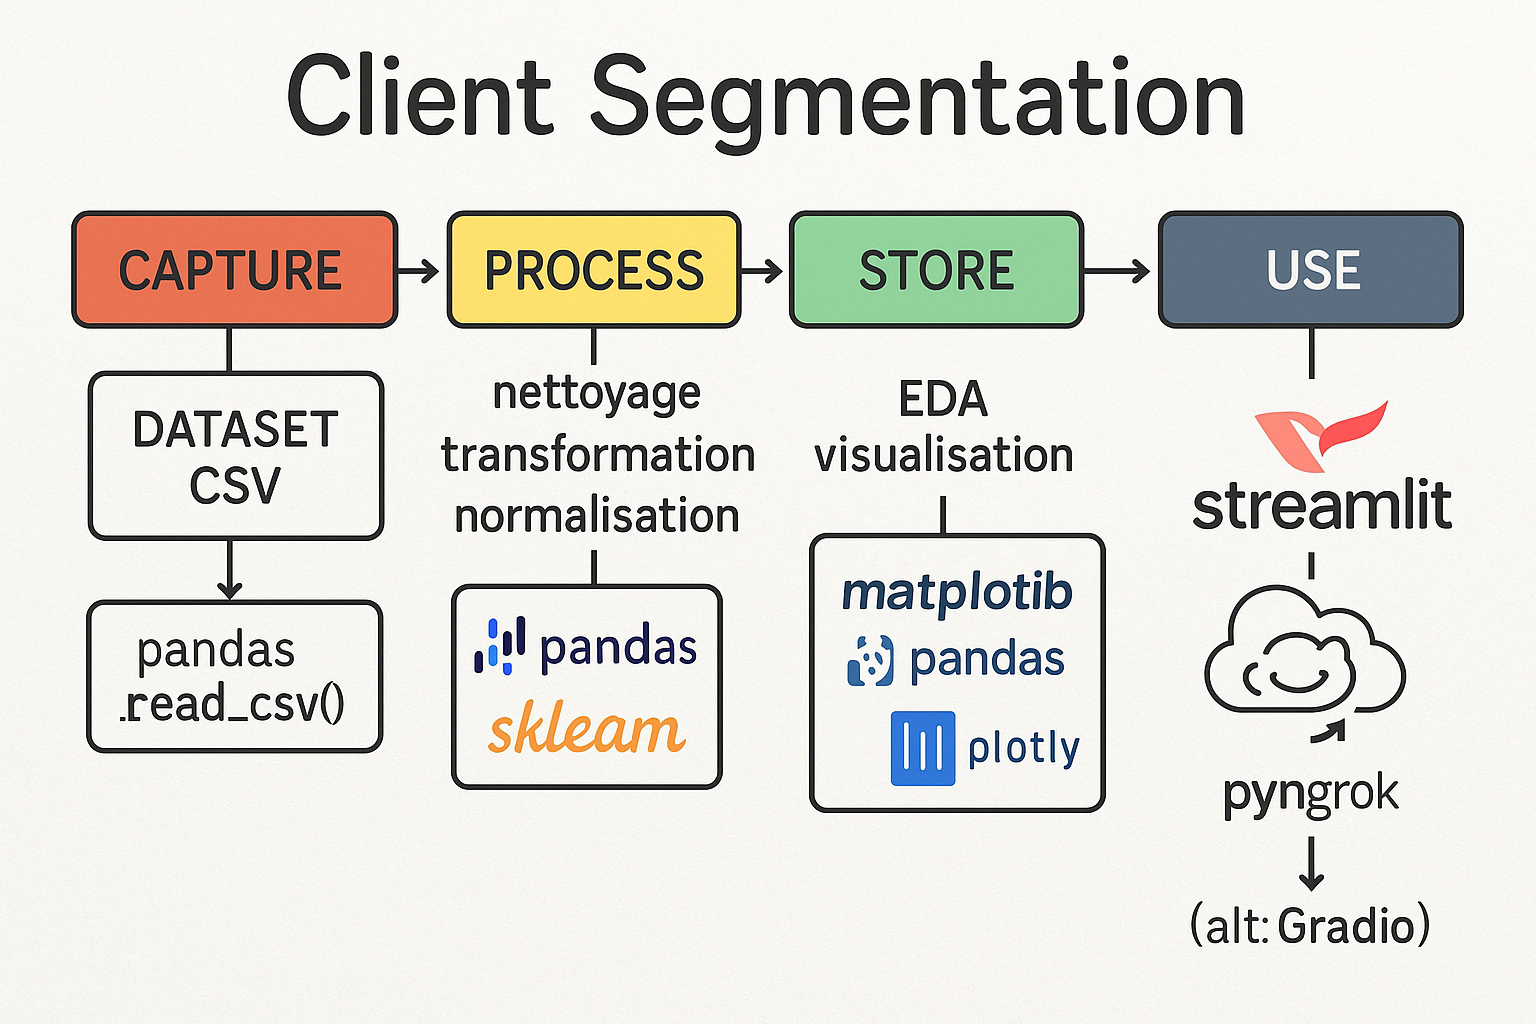